In [ ]:
"""  Let's ask these questions

Let's say you have deployed a model in production and after sometime, It start performing worst, Your company found one more variables for the

model to get added on for the same problem statement, You want to run many models at the same time etc.

Question 1. How will you update your model without a shutting down your process?

Question 2. How can you run many models at the same time for different different problem statements?

Question 3. How will you handle this issue of current model not performing well and You are asked to roll back to previous version?

Only tool which can answer to all these above questions is Tensorflow Serving.


What is Tensorflow Serving :

Role of tensorflow serving on the server. This server side is split into two different parts

1. Tensorflow Serving
2. File system

In the Tensorflow serving, We have three models saved. Model could be the same but has three different versions of it or totally different models.
Let's say we have model which we want to serve based on our GEO Location, 
For ppl in London Model version 1 and for people in Mumbai Model version 2 and for Berlin Model version 3. 
Or we want to serve model 1 on this set of users and rest should be as it . A Model is called servalable because we are serving the model. 

Version manager :

Either we can have several models for several tasks or we can just have many models for one task. 
We have to decide it. In case we have many models and want to make sure newest version of model is to be tested. 
We can specify in version manager and it will help us to handle the current version of model

Model Loader :

It takes the msg from version manager, what model to load and provide back to version manager and 
model loader will reach to file system for version of model and load it"""

print(".")

.


## Step 1: Install dependencies and setting up GPU environment

In [ ]:
!echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2343  100  2343    0     0   127k      0 --:--:-- --:--:-- --:--:--  127k
OK


In [ ]:
!apt-get update & apt-get install tensorflow-model-server

Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Reading package lists... Done
Hit:13 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Building dependency tree       
Reading state information... Done
0% [8 I

In [ ]:
!pip install tensorflow-gpu==1.13.1

In [ ]:
!pip install requests

## Step 2: Import project dependencies

In [ ]:
""" Importing the dependencies """

import os
import json
import random
import requests
import subprocess
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'1.13.1'

## Step 3: Dataset preprocessing

### Loading the dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Image normalization

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train.shape

(50000, 32, 32, 3)

## Step 4: Defining the model

NOTE: We are using the model from the Section for Convolutional neural networks

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


### Compiling the model

In [ ]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

### Training the model

In [ ]:
model.fit(X_train, 
          y_train, 
          batch_size=128, 
          epochs=10)

Epoch 1/10
50000/50000 [==============================] - 7s 141us/sample - loss: 1.4657 - sparse_categorical_accuracy: 0.4686
Epoch 2/10
50000/50000 [==============================] - 5s 96us/sample - loss: 1.0144 - sparse_categorical_accuracy: 0.6450
Epoch 3/10
50000/50000 [==============================] - 5s 96us/sample - loss: 0.8384 - sparse_categorical_accuracy: 0.7076
Epoch 4/10
50000/50000 [==============================] - 5s 95us/sample - loss: 0.7225 - sparse_categorical_accuracy: 0.7475
Epoch 5/10
50000/50000 [==============================] - 5s 96us/sample - loss: 0.6239 - sparse_categorical_accuracy: 0.7837
Epoch 6/10
50000/50000 [==============================] - 5s 96us/sample - loss: 0.5285 - sparse_categorical_accuracy: 0.8161
Epoch 7/10
50000/50000 [==============================] - 5s 96us/sample - loss: 0.4438 - sparse_categorical_accuracy: 0.8440
Epoch 8/10
50000/50000 [==============================] - 5s 96us/sample - loss: 0.3632 - sparse_categorical_accuracy

### Model evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.9765 - sparse_categorical_accuracy: 0.7377


In [ ]:
print("Test accuracy is {}".format(test_accuracy))

Test accuracy is 0.7376999855041504


## Step 5: Saving the model for production

### Creating the directory for the model

In [ ]:
MODEL_DIR = "model/"
version = 1

In [ ]:
export_path = os.path.join(MODEL_DIR, str(version))
export_path

'model/1'

In [ ]:
if os.path.isdir(export_path):
    !rm -r {export_path}

### Saving the model for the TensorFlow Serving

In [ ]:
tf.saved_model.simple_save(tf.keras.backend.get_session(), export_dir=export_path, inputs={"input_image":model.input}, outputs={t.name:t for t in model.outputs})

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: model/1/saved_model.pb


## Step 6: Setting up the production environment

### Exporting the MODEL_DIR to environment variables

In [ ]:
os.environ['MODEL_DIR'] = os.path.abspath(MODEL_DIR)

### Running the TensorFlow Serving REST API

In [ ]:
%%bash --bg
nohup tensorflow_model_server --rest_api_port=8501 --model_name=cifar10 --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
!tail server.log

2019-05-18 20:29:27.796175: E tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:369] FileSystemStoragePathSource encountered a file-system access error: Could not find base path /content//content/model for servable cifar10
2019-05-18 20:29:28.796442: E tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:369] FileSystemStoragePathSource encountered a file-system access error: Could not find base path /content//content/model for servable cifar10
2019-05-18 20:29:29.796596: E tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:369] FileSystemStoragePathSource encountered a file-system access error: Could not find base path /content//content/model for servable cifar10
2019-05-18 20:29:30.796709: E tensorflow_serving/sources/storage_path/file_system_storage_path_source.cc:369] FileSystemStoragePathSource encountered a file-system access error: Could not find base path /content//content/model for servable cifar10
2019-05-

## Step 7: Creating the first POST request

In [ ]:
random_image = np.random.randint(0, len(X_test))
random_image

620

### Creating the JSON data object

In [ ]:
data = json.dumps({"signature_name":"serving_default", "instances":[X_test[random_image].tolist()]})

### Sending the first POST request to the model

In [ ]:
headers = {"content-type":"application/json"}

In [ ]:
json_response = requests.post(url="http://localhost:8501/v1/models/cifar10:predict", data=data, headers=headers)

In [ ]:
json_response

<Response [200]>

In [ ]:
predictions = json.loads(json_response.text)['predictions']

In [ ]:
predictions

[[1.43151e-05,
  8.25434e-09,
  0.00420625,
  0.0147217,
  0.0125217,
  0.00353992,
  0.000103995,
  0.964891,
  1.08745e-06,
  5.2131e-09]]

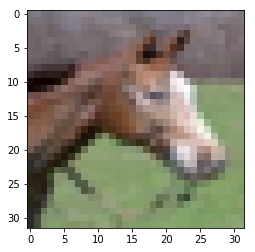

In [ ]:
plt.imshow(X_test[random_image])

In [ ]:
class_names[np.argmax(predictions[0])]

'horse'

## Step 8: Sending the POST request to a specific model

In [ ]:
specific_json_response = requests.post(url="http://localhost:8501/v1/models/cifar10/versions/1:predict", data=data, headers=headers)

In [ ]:
specific_json_response

<Response [200]>